In [1]:
import pandas as pd
import seaborn as sns
import glob
import numpy as np
import scipy.stats as stats
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [41]:
df = pd.read_csv('full_data.csv')

In [43]:
df

,Date,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,pH,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu,ALL_RUNS,Average_count
0,2012-01-02,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,12.882616,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549,1.000000,1.000000
1,2012-01-04,193.600000,122.520879,0.547661,89.083333,2.213170,7.594118,6.921075,1301.784946,9.002637,7.729412,37.850899,174.556436,10.337000,0.063292,307.200000,20.572222,2.000000,2.000000
2,2012-01-05,181.490909,113.369841,0.504410,71.920000,1.184673,14.750000,7.390233,1087.367089,10.031494,7.860330,16.172447,140.811111,10.844410,0.068047,283.500000,14.195000,1.333333,1.333333
3,2012-01-06,225.589744,76.544444,0.380976,131.500000,0.650909,10.138017,6.379655,824.392308,10.865500,7.825333,39.554936,174.591667,9.376547,0.052374,318.000000,20.026667,4.647059,2.647059
4,2012-01-08,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,6.610000,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549,29.357143,21.373016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2022-12-05,189.292035,213.972131,0.120698,196.333333,0.512113,10.138017,7.581928,756.168067,10.324298,7.801773,33.246512,267.452381,7.772568,0.050829,208.888889,23.420000,37.166667,18.750000
2022,2022-12-07,182.768519,181.815909,0.126429,287.018100,0.642478,10.138017,5.316471,765.852113,11.337664,7.916333,57.481250,323.219512,8.172836,0.031036,313.025758,28.695714,32.000000,24.339286
2023,2022-12-08,181.613208,71.016327,0.128698,287.018100,0.768546,10.138017,4.368175,696.209091,12.096786,7.933411,46.443605,261.861538,8.892500,0.036092,313.025758,30.445000,19.277778,17.055556
2024,2022-12-09,180.666667,35.100000,0.200904,287.018100,1.782130,10.138017,3.596154,714.621212,12.220563,7.990278,26.866667,302.357143,7.085451,0.033739,248.000000,20.183333,44.763158,43.473684


In [44]:

df_final =  df.drop(columns={"Average_count","ALL_RUNS","Date"})
df_final

,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,pH,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu
0,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,12.882616,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549
1,193.600000,122.520879,0.547661,89.083333,2.213170,7.594118,6.921075,1301.784946,9.002637,7.729412,37.850899,174.556436,10.337000,0.063292,307.200000,20.572222
2,181.490909,113.369841,0.504410,71.920000,1.184673,14.750000,7.390233,1087.367089,10.031494,7.860330,16.172447,140.811111,10.844410,0.068047,283.500000,14.195000
3,225.589744,76.544444,0.380976,131.500000,0.650909,10.138017,6.379655,824.392308,10.865500,7.825333,39.554936,174.591667,9.376547,0.052374,318.000000,20.026667
4,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,6.610000,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,189.292035,213.972131,0.120698,196.333333,0.512113,10.138017,7.581928,756.168067,10.324298,7.801773,33.246512,267.452381,7.772568,0.050829,208.888889,23.420000
2022,182.768519,181.815909,0.126429,287.018100,0.642478,10.138017,5.316471,765.852113,11.337664,7.916333,57.481250,323.219512,8.172836,0.031036,313.025758,28.695714
2023,181.613208,71.016327,0.128698,287.018100,0.768546,10.138017,4.368175,696.209091,12.096786,7.933411,46.443605,261.861538,8.892500,0.036092,313.025758,30.445000
2024,180.666667,35.100000,0.200904,287.018100,1.782130,10.138017,3.596154,714.621212,12.220563,7.990278,26.866667,302.357143,7.085451,0.033739,248.000000,20.183333


In [45]:
#Calculate the weight

standards = {
  
    
    'Alky pH 4.5': 500, 
    'Chloride Ion':250,
    'Orthophospht':1.17, 
    'Sulphate SO4':250,
    'Ammonia(N)':1.5, 
    'TurbidityNTU':4, 
    'Temp Water': 28, 
    'Cond @ 25C': 800, 
    'Oxygen Diss': 14.6,
    'pH': 8.5, 
    'BOD ATU': 5, 
    'COD as O2': 150, 
    'Nitrate-N': 50, 
    'Nitrite-N': 0.5, 
    'Hardness':150,
    'SALinsitu':38.6
  
}
 

def calculate_weighted_average(S):
    # Calculate the weighted average using the formula
    w = k/S

    return w


total = 0
for value in standards.values():
    total += 1/value
    k = 1/total

standards_arr = []  # Define an empty array to store the standards
weighted_avg_arr = []  # Define an empty array to store the weighted averages
for key, value in standards.items():
    w = calculate_weighted_average(value)
    weighted_avg_arr.append(w)  # Append the calculated weighted average to the array
    standards_arr.append(value)  # Append the standard and its value to the array
    print(key, w)

Alky pH 4.5 0.0004690748248971935
Chloride Ion 0.000938149649794387
Orthophospht 0.20045932687914253
Sulphate SO4 0.000938149649794387
Ammonia(N) 0.15635827496573115
TurbidityNTU 0.058634353112149186
Temp Water 0.008376336158878455
Cond @ 25C 0.00029317176556074593
Oxygen Diss 0.016064206332095668
pH 0.027592636758658442
BOD ATU 0.04690748248971935
COD as O2 0.0015635827496573117
Nitrate-N 0.004690748248971935
Nitrite-N 0.4690748248971935
Hardness 0.0015635827496573117
SALinsitu 0.006076098768098361


In [46]:
# Calculating Water Quality Index of each sample
df_num_final = df_final.select_dtypes(exclude="datetime64[ns]")

# Weight Vector(wi)
wi = np.array(weighted_avg_arr)

# Standard values of parameters(si)
si = np.array(standards_arr )

#si = [df_final.iloc[:,colnum].median() for colnum in range(2,7)]
# Ideal values of paramters(vIdeal)
vIdeal = np.array([150, 120, 0, 200, 0, 0.4, 25, 400, 9, 7, 6, 0, 0, 0, 8, 0.35])


#print(si)
def calc_wqi(sample):
    wqi_sample = 0
    num_col = 16
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
        wqi_sample = wqi_sample/sum(wi)
    return wqi_sample

In [47]:
wi

array([4.69074825e-04, 9.38149650e-04, 2.00459327e-01, 9.38149650e-04,
       1.56358275e-01, 5.86343531e-02, 8.37633616e-03, 2.93171766e-04,
       1.60642063e-02, 2.75926368e-02, 4.69074825e-02, 1.56358275e-03,
       4.69074825e-03, 4.69074825e-01, 1.56358275e-03, 6.07609877e-03])

In [48]:
df_final

,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,pH,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu
0,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,12.882616,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549
1,193.600000,122.520879,0.547661,89.083333,2.213170,7.594118,6.921075,1301.784946,9.002637,7.729412,37.850899,174.556436,10.337000,0.063292,307.200000,20.572222
2,181.490909,113.369841,0.504410,71.920000,1.184673,14.750000,7.390233,1087.367089,10.031494,7.860330,16.172447,140.811111,10.844410,0.068047,283.500000,14.195000
3,225.589744,76.544444,0.380976,131.500000,0.650909,10.138017,6.379655,824.392308,10.865500,7.825333,39.554936,174.591667,9.376547,0.052374,318.000000,20.026667
4,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,6.610000,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,189.292035,213.972131,0.120698,196.333333,0.512113,10.138017,7.581928,756.168067,10.324298,7.801773,33.246512,267.452381,7.772568,0.050829,208.888889,23.420000
2022,182.768519,181.815909,0.126429,287.018100,0.642478,10.138017,5.316471,765.852113,11.337664,7.916333,57.481250,323.219512,8.172836,0.031036,313.025758,28.695714
2023,181.613208,71.016327,0.128698,287.018100,0.768546,10.138017,4.368175,696.209091,12.096786,7.933411,46.443605,261.861538,8.892500,0.036092,313.025758,30.445000
2024,180.666667,35.100000,0.200904,287.018100,1.782130,10.138017,3.596154,714.621212,12.220563,7.990278,26.866667,302.357143,7.085451,0.033739,248.000000,20.183333


In [49]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [50]:
df_final

,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,pH,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu
0,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,12.882616,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549
1,193.600000,122.520879,0.547661,89.083333,2.213170,7.594118,6.921075,1301.784946,9.002637,7.729412,37.850899,174.556436,10.337000,0.063292,307.200000,20.572222
2,181.490909,113.369841,0.504410,71.920000,1.184673,14.750000,7.390233,1087.367089,10.031494,7.860330,16.172447,140.811111,10.844410,0.068047,283.500000,14.195000
3,225.589744,76.544444,0.380976,131.500000,0.650909,10.138017,6.379655,824.392308,10.865500,7.825333,39.554936,174.591667,9.376547,0.052374,318.000000,20.026667
4,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,6.610000,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,189.292035,213.972131,0.120698,196.333333,0.512113,10.138017,7.581928,756.168067,10.324298,7.801773,33.246512,267.452381,7.772568,0.050829,208.888889,23.420000
2022,182.768519,181.815909,0.126429,287.018100,0.642478,10.138017,5.316471,765.852113,11.337664,7.916333,57.481250,323.219512,8.172836,0.031036,313.025758,28.695714
2023,181.613208,71.016327,0.128698,287.018100,0.768546,10.138017,4.368175,696.209091,12.096786,7.933411,46.443605,261.861538,8.892500,0.036092,313.025758,30.445000
2024,180.666667,35.100000,0.200904,287.018100,1.782130,10.138017,3.596154,714.621212,12.220563,7.990278,26.866667,302.357143,7.085451,0.033739,248.000000,20.183333


In [51]:
wqi_arr = calc_wqi_for_df(df_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"])
df_final = df_final

In [52]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
#df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(2026, 17)

In [53]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
#df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(2026, 20)

In [54]:
df_wqi

,Date,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,pH,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu,ALL_RUNS,Average_count,WQI
0,2012-01-02,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,12.882616,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549,1.000000,1.000000,-123.492166
1,2012-01-04,193.600000,122.520879,0.547661,89.083333,2.213170,7.594118,6.921075,1301.784946,9.002637,7.729412,37.850899,174.556436,10.337000,0.063292,307.200000,20.572222,2.000000,2.000000,-102.206554
2,2012-01-05,181.490909,113.369841,0.504410,71.920000,1.184673,14.750000,7.390233,1087.367089,10.031494,7.860330,16.172447,140.811111,10.844410,0.068047,283.500000,14.195000,1.333333,1.333333,0.573738
3,2012-01-06,225.589744,76.544444,0.380976,131.500000,0.650909,10.138017,6.379655,824.392308,10.865500,7.825333,39.554936,174.591667,9.376547,0.052374,318.000000,20.026667,4.647059,2.647059,-125.651754
4,2012-01-08,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,6.610000,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549,29.357143,21.373016,-125.243551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2022-12-05,189.292035,213.972131,0.120698,196.333333,0.512113,10.138017,7.581928,756.168067,10.324298,7.801773,33.246512,267.452381,7.772568,0.050829,208.888889,23.420000,37.166667,18.750000,-101.748096
2022,2022-12-07,182.768519,181.815909,0.126429,287.018100,0.642478,10.138017,5.316471,765.852113,11.337664,7.916333,57.481250,323.219512,8.172836,0.031036,313.025758,28.695714,32.000000,24.339286,-215.550906
2023,2022-12-08,181.613208,71.016327,0.128698,287.018100,0.768546,10.138017,4.368175,696.209091,12.096786,7.933411,46.443605,261.861538,8.892500,0.036092,313.025758,30.445000,19.277778,17.055556,-162.079002
2024,2022-12-09,180.666667,35.100000,0.200904,287.018100,1.782130,10.138017,3.596154,714.621212,12.220563,7.990278,26.866667,302.357143,7.085451,0.033739,248.000000,20.183333,44.763158,43.473684,-58.976110


In [55]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,Date,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,pH,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu,ALL_RUNS,Average_count,WQI
0,2012-01-02,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,12.882616,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549,1.000000,1.000000,-123.492166
1,2012-01-04,193.600000,122.520879,0.547661,89.083333,2.213170,7.594118,6.921075,1301.784946,9.002637,7.729412,37.850899,174.556436,10.337000,0.063292,307.200000,20.572222,2.000000,2.000000,-102.206554
3,2012-01-06,225.589744,76.544444,0.380976,131.500000,0.650909,10.138017,6.379655,824.392308,10.865500,7.825333,39.554936,174.591667,9.376547,0.052374,318.000000,20.026667,4.647059,2.647059,-125.651754
4,2012-01-08,202.702330,290.161737,0.395029,287.018100,1.550881,10.138017,6.610000,1115.134319,9.369837,7.887049,41.806727,259.462151,8.194472,0.063292,313.025758,22.524549,29.357143,21.373016,-125.243551
6,2012-01-10,200.882353,290.161737,0.673500,132.422222,1.017353,6.012000,8.677794,1115.134319,10.098571,7.793837,59.300233,253.422222,10.186489,0.073636,304.883333,25.070000,41.200000,23.800000,-213.472773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2022-12-05,189.292035,213.972131,0.120698,196.333333,0.512113,10.138017,7.581928,756.168067,10.324298,7.801773,33.246512,267.452381,7.772568,0.050829,208.888889,23.420000,37.166667,18.750000,-101.748096
2022,2022-12-07,182.768519,181.815909,0.126429,287.018100,0.642478,10.138017,5.316471,765.852113,11.337664,7.916333,57.481250,323.219512,8.172836,0.031036,313.025758,28.695714,32.000000,24.339286,-215.550906
2023,2022-12-08,181.613208,71.016327,0.128698,287.018100,0.768546,10.138017,4.368175,696.209091,12.096786,7.933411,46.443605,261.861538,8.892500,0.036092,313.025758,30.445000,19.277778,17.055556,-162.079002
2024,2022-12-09,180.666667,35.100000,0.200904,287.018100,1.782130,10.138017,3.596154,714.621212,12.220563,7.990278,26.866667,302.357143,7.085451,0.033739,248.000000,20.183333,44.763158,43.473684,-58.976110


In [56]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [57]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (3 if (x <= 25)  
                                        else(2 if (26<=x<=50) 
                                        else(1 if (51<=x<=75) 
                                        else 0))))

In [58]:
df_wqi.head()

,Date,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,...,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu,ALL_RUNS,Average_count,WQI,WQI clf
2,2012-01-05,181.490909,113.369841,0.504410,71.920000,1.184673,14.750000,7.390233,1087.367089,10.031494,...,16.172447,140.811111,10.844410,0.068047,283.500000,14.195000,1.333333,1.333333,0.573738,3
5,2012-01-09,220.684211,142.301587,0.819167,886.400000,2.830066,9.246154,9.044861,1176.500000,10.089863,...,7.575197,66.107143,10.654855,0.063292,307.000000,22.524549,45.000000,45.000000,56.197425,1
8,2012-01-16,216.928571,361.460000,0.476744,118.950000,1.355232,35.100000,4.559789,1490.131343,11.696173,...,22.517364,147.395833,10.564346,0.068554,313.025758,23.973000,29.954545,28.863636,5.273402,3
9,2012-01-17,235.390244,162.814286,0.819191,213.333333,4.351483,16.451852,3.959510,1156.449383,12.124239,...,17.923786,113.724561,9.471521,0.049162,347.000000,22.524549,12.125000,6.500000,31.841305,2
13,2012-01-23,224.803922,105.854167,0.460703,95.354545,1.112021,9.292308,6.882867,1002.506849,9.910886,...,5.865691,32.183673,8.754667,0.061222,399.181818,30.526250,2.200000,1.400000,38.055600,2


In [59]:
sa = df_wqi[df_wqi['WQI clf'] == 3]
sa.count()

Date             88
Alky pH 4.5      88
Chloride Ion     88
Orthophospht     88
Sulphate SO4     88
Ammonia(N)       88
TurbidityNTU     88
Temp Water       88
Cond @ 25C       88
Oxygen Diss      88
pH               88
BOD ATU          88
COD as O2        88
Nitrate-N        88
Nitrite-N        88
Hardness         88
SALinsitu        88
ALL_RUNS         88
Average_count    88
WQI              88
WQI clf          88
dtype: int64

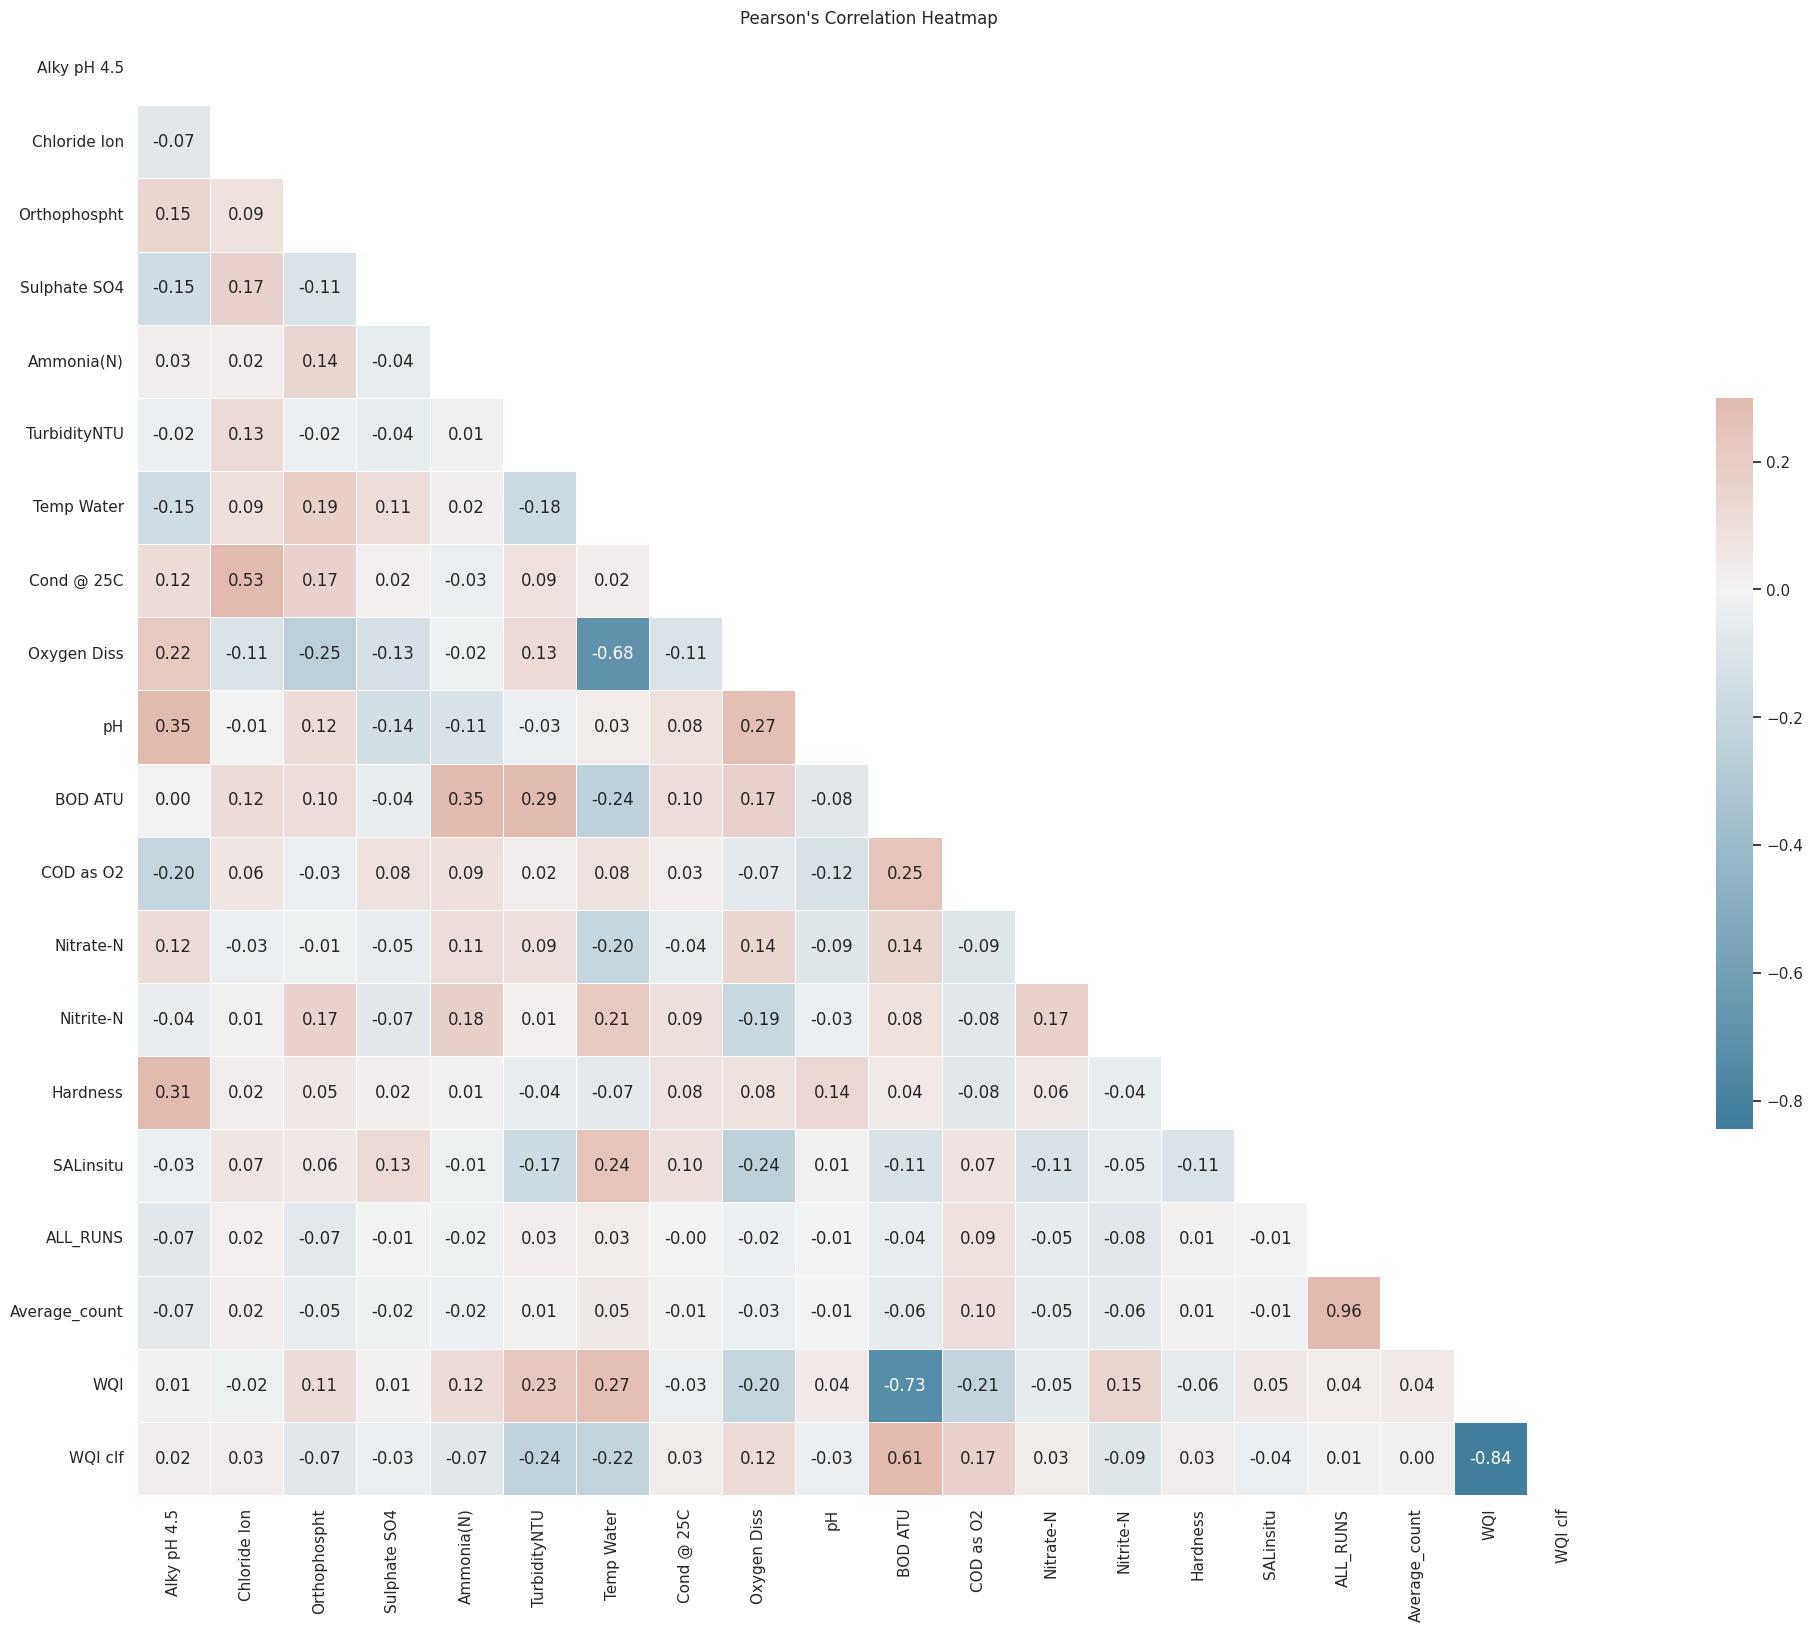

In [65]:
# Calculate Pearson's correlation
corr = df_wqi.corr(numeric_only =True, method='pearson')

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the subplot grid
fig, ax = plt.subplots(figsize=(30, 19))



# Set the color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set the Seaborn style
sns.set(style='whitegrid')

# Create the heatmap with Seaborn
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f',
            cbar_kws={"shrink": .5})

# Set the title of the heatmap
plt.title("Pearson's Correlation Heatmap")

# Display the plot
plt.show()


In [66]:
corr

,Alky pH 4.5,Chloride Ion,Orthophospht,Sulphate SO4,Ammonia(N),TurbidityNTU,Temp Water,Cond @ 25C,Oxygen Diss,pH,BOD ATU,COD as O2,Nitrate-N,Nitrite-N,Hardness,SALinsitu,ALL_RUNS,Average_count,WQI,WQI clf
Alky pH 4.5,1.000000,-0.073483,0.150345,-0.149767,0.026305,-0.023850,-0.147462,0.122068,0.220237,0.345633,0.001991,-0.203885,0.123295,-0.036578,0.305572,-0.027393,-0.071970,-0.068733,0.008697,0.022772
Chloride Ion,-0.073483,1.000000,0.086900,0.167807,0.024619,0.128300,0.091644,0.528045,-0.109759,-0.006152,0.121136,0.060510,-0.031303,0.012383,0.018594,0.067572,0.018183,0.018517,-0.015598,0.028523
Orthophospht,0.150345,0.086900,1.000000,-0.111415,0.144910,-0.023316,0.185383,0.166887,-0.249383,0.122995,0.100366,-0.027944,-0.014019,0.166571,0.053231,0.055865,-0.070253,-0.045219,0.114115,-0.072656
Sulphate SO4,-0.149767,0.167807,-0.111415,1.000000,-0.043181,-0.040192,0.111848,0.015818,-0.127733,-0.138058,-0.040971,0.082775,-0.048298,-0.072017,0.020484,0.125969,-0.007539,-0.020576,0.010919,-0.034626
Ammonia(N),0.026305,0.024619,0.144910,-0.043181,1.000000,0.005231,0.018899,-0.034813,-0.021848,-0.113849,0.352866,0.094819,0.105385,0.175353,0.010651,-0.013757,-0.018293,-0.023250,0.117105,-0.072538
TurbidityNTU,-0.023850,0.128300,-0.023316,-0.040192,0.005231,1.000000,-0.177575,0.089517,0.129483,-0.032194,0.288775,0.020808,0.090024,0.014968,-0.044428,-0.165520,0.029137,0.007799,0.227105,-0.235918
Temp Water,-0.147462,0.091644,0.185383,0.111848,0.018899,-0.177575,1.000000,0.021517,-0.684670,0.033026,-0.242014,0.079550,-0.204475,0.213229,-0.065642,0.243438,0.034414,0.047226,0.272325,-0.222444
Cond @ 25C,0.122068,0.528045,0.166887,0.015818,-0.034813,0.089517,0.021517,1.000000,-0.110334,0.078676,0.100705,0.030464,-0.043750,0.094033,0.076344,0.096332,-0.002350,-0.011400,-0.030959,0.034959
Oxygen Diss,0.220237,-0.109759,-0.249383,-0.127733,-0.021848,0.129483,-0.684670,-0.110334,1.000000,0.271068,0.168626,-0.066262,0.142568,-0.190058,0.076848,-0.237034,-0.023450,-0.034135,-0.201330,0.119716
pH,0.345633,-0.006152,0.122995,-0.138058,-0.113849,-0.032194,0.033026,0.078676,0.271068,1.000000,-0.079780,-0.121330,-0.085035,-0.027287,0.138610,0.009942,-0.006217,-0.005046,0.044853,-0.028470


In [67]:
df_wqi.to_csv("wqi_full.csv")